# Wine Quality EDA

https://github.com/willgosnold/wine_quality_eda

### Please see the PDF report that accompanies this notebook for a detailed analysis of the plots created here. This can be found in the github repository linked above.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D


import pandas as pd
import plotly.express as px
import seaborn as sns
import missingno

# Set the theme for the visualisations
sns.set_theme(context="paper", font_scale=1.2, style="ticks", palette="Reds")


In [2]:
# Load the data
wine_df = pd.read_csv("datasets/winequality-red.csv", sep=";")
wine_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Check the data types
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# View mean and range of each column
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


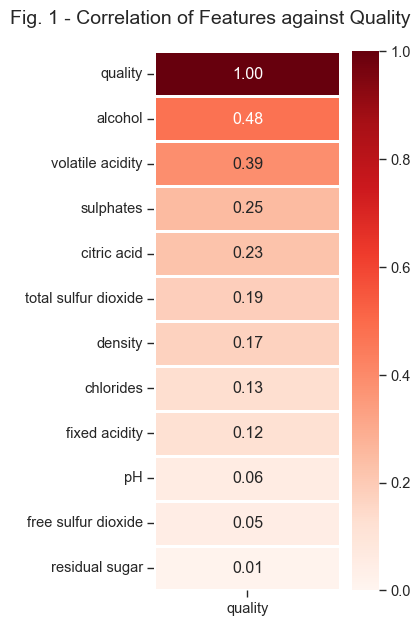

In [5]:
# Create a correlation heatmap to see which features are most correlated with quality
plt.figure(figsize=(3, 7))

sns.heatmap(
    data=(
        wine_df.corr(numeric_only=True)[["quality"]]
        .abs()  # Show absolute correlation rather than positive or negative
        .sort_values(by="quality", ascending=False)
    ),
    cmap="Reds",
    annot=True,
    vmin=0,
    linewidth=1,
    fmt=".2f",
)

# Add title and show
plt.title(
    "Fig. 1 - Correlation of Features against Quality", pad=20, x=0.3, fontsize=14
)
plt.show()


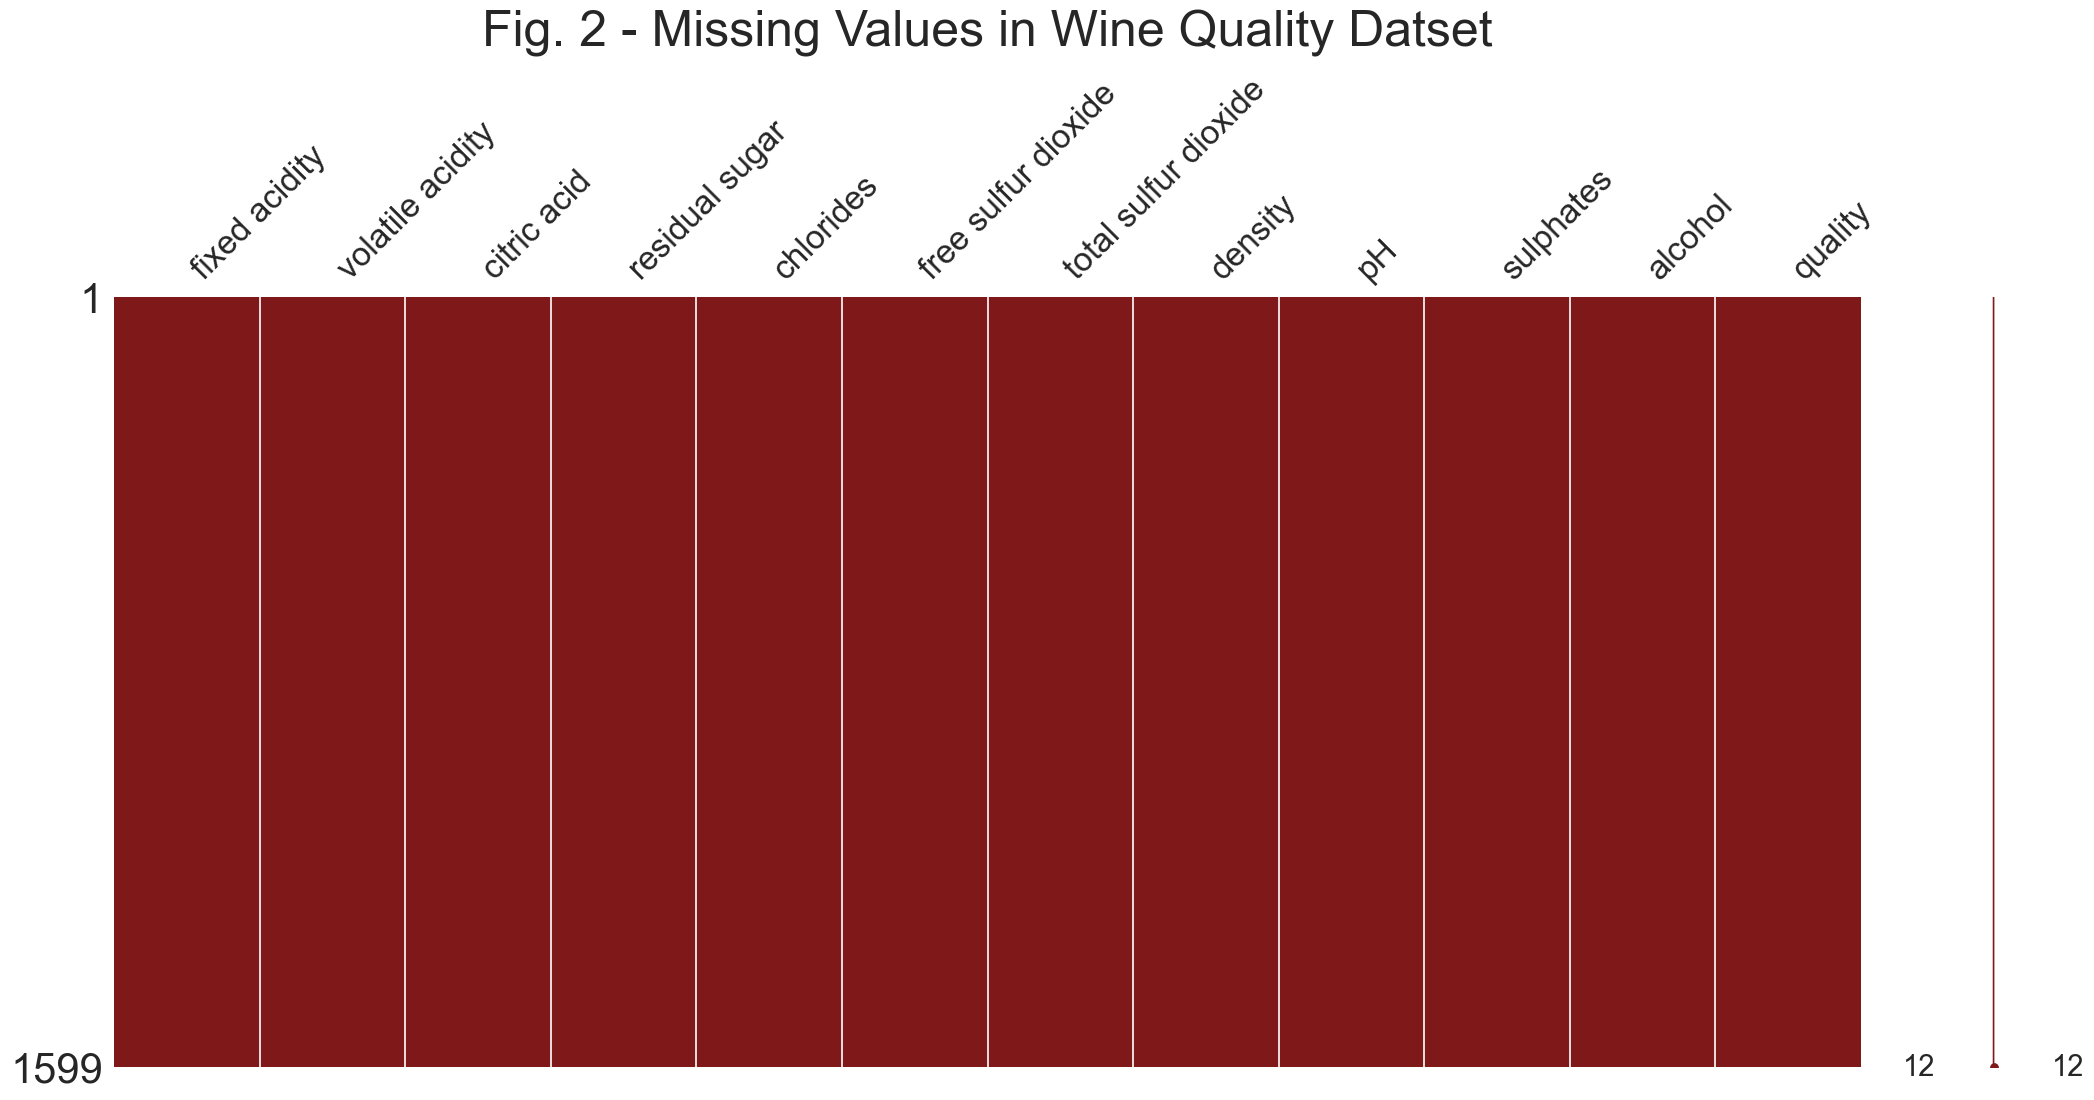

In [6]:
# Create missing data matrix to show any NaN values
missingno.matrix(wine_df, color=(0.5, 0.1, 0.1), fontsize=24)

# Add title and show
plt.title("Fig. 2 - Missing Values in Wine Quality Datset", fontsize = 36, pad=20)
plt.show()

In [7]:
# Set the theme for the visuls going foward
sns.set_theme(context="paper", font_scale=1.2, style="darkgrid", palette="Reds")


In [8]:
# Define a list of the independent variables
cols = wine_df.columns.to_list()[:-1]

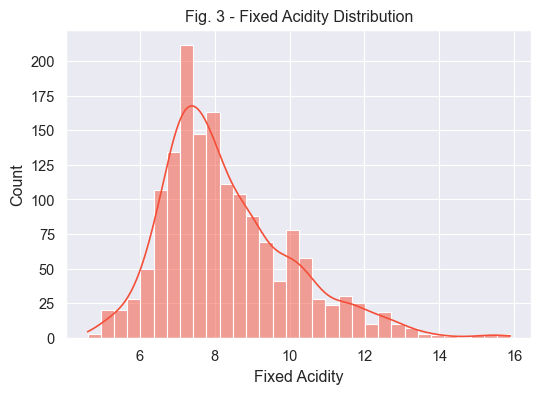

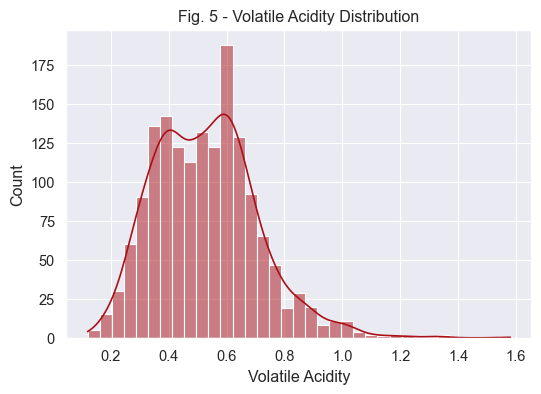

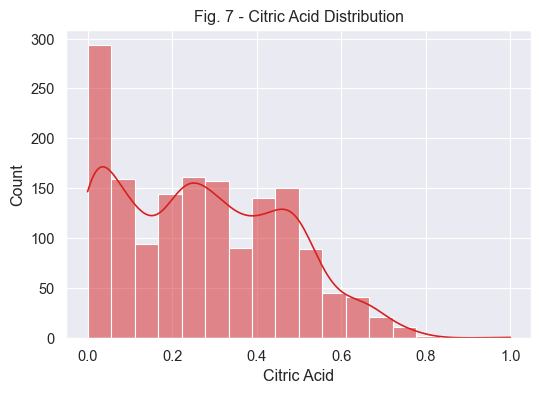

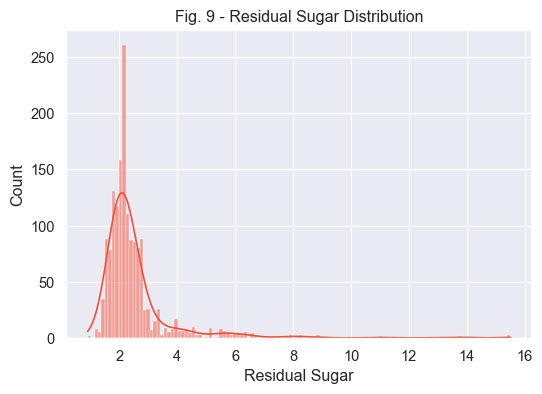

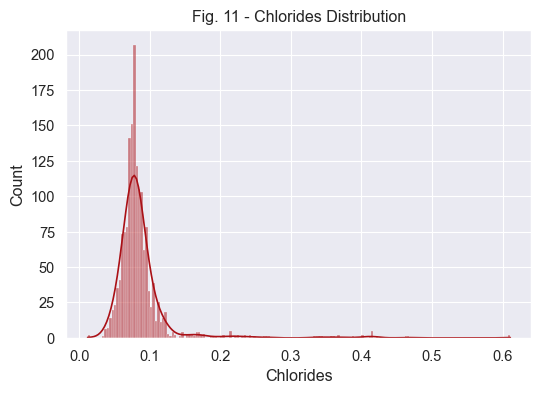

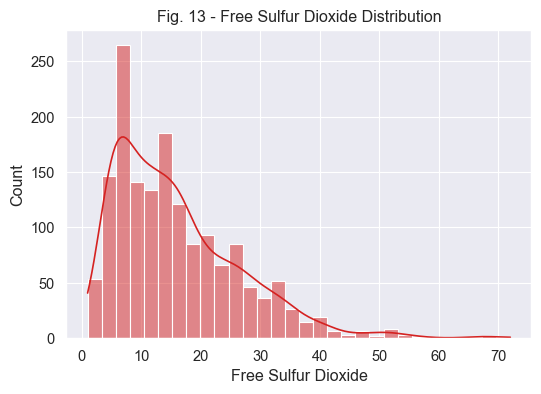

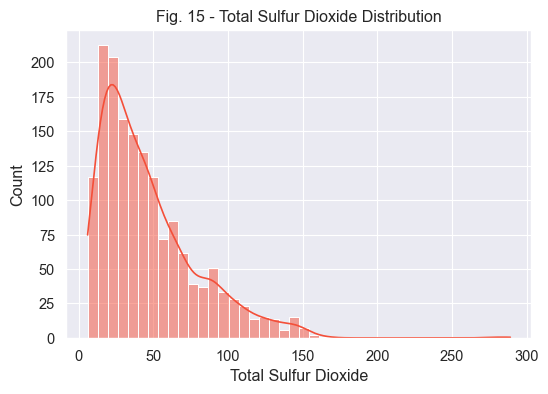

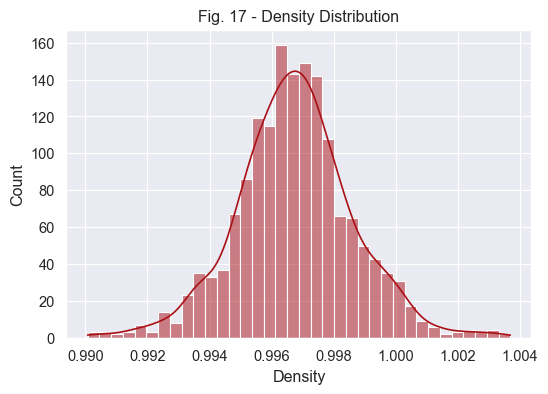

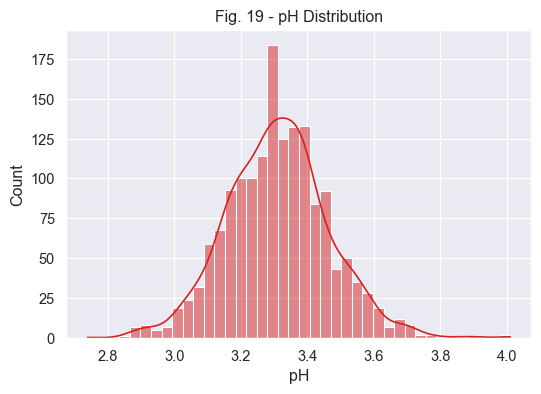

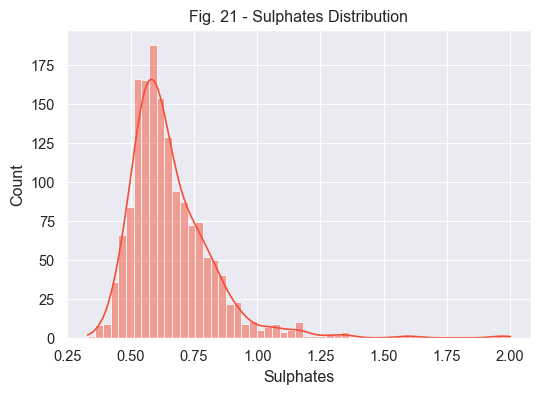

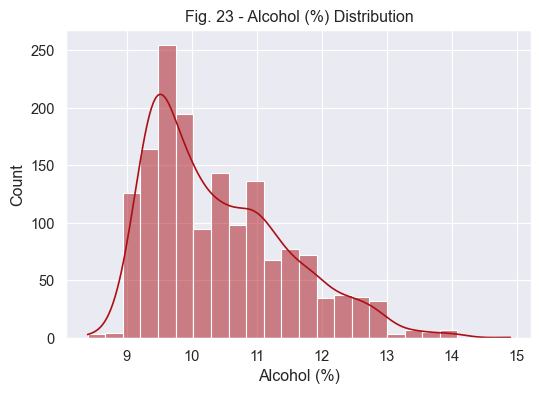

In [9]:
def make_hists(df, categories, fig_start_num, custom_label=None):
    """Creates a histplot for all columns in a given list of categories.

    Parameters
    ----------
    categories : list
        A list of strings containing the column names of the data to plot.
    fig_start_num : int
        The "Fig." number to start from.

    Returns
    -------
    None
    """

    # Set the figure number to start from
    i = fig_start_num

    # Loop through each column in the list and create plot for each
    for column in categories:
        plt.figure(figsize=(6, 4))

        
        # Set the colour palette to use
        palette = sns.color_palette("Reds")[3:]

        # Create the plot
        ax = sns.histplot(
            data=df[column],
            kde=True,
            # Make each graph the next colour in the palette
            # % len(palette) prevents index error by looping back to start
            # if there are too many values.
            color=palette[(i - fig_start_num) % len(palette)],
        )

        # Format the labels to remove any underscores and capitalise the first letter
        label = column.replace("_", " ").title()
        # Label the graphs and show
        if custom_label and column in custom_label:
            ax.set_xlabel(f"{custom_label[column]}")
            ax.set_title(f"Fig. {i} - {custom_label[column]} Distribution")
        else:
            ax.set_xlabel(f"{label}")
            ax.set_title(f"Fig. {i} - {label} Distribution")

        plt.show()
        # i += 2 as I am going to make another graph for each in between
        i += 2

# Create a histogram for each independent variable
make_hists(df=wine_df, categories=cols, fig_start_num=3, custom_label={"pH": "pH", "alcohol": "Alcohol (%)"})


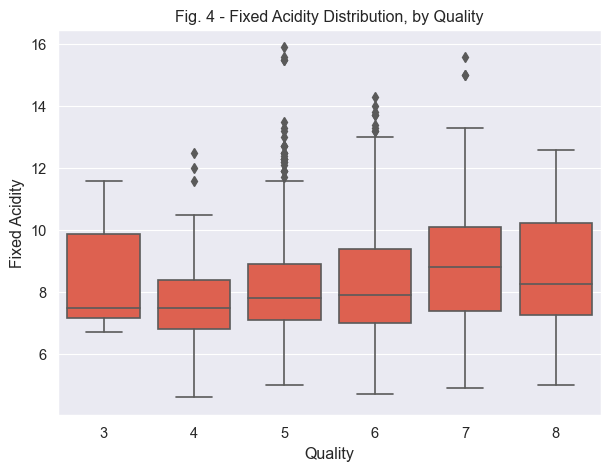

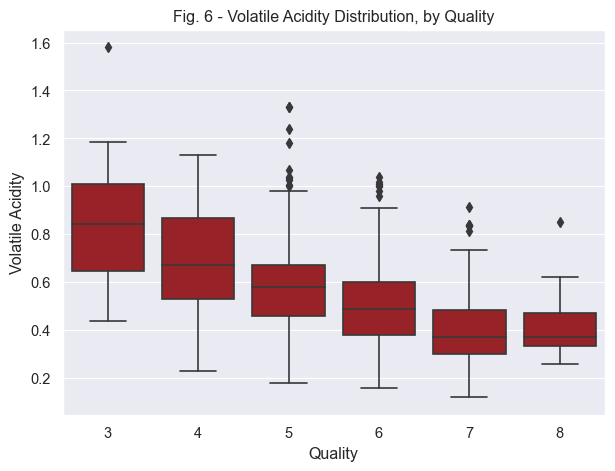

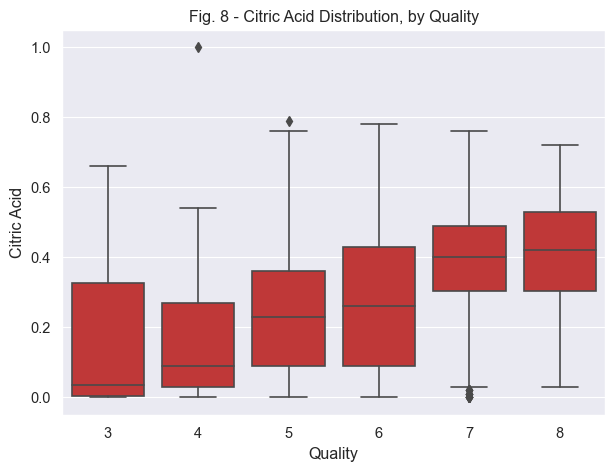

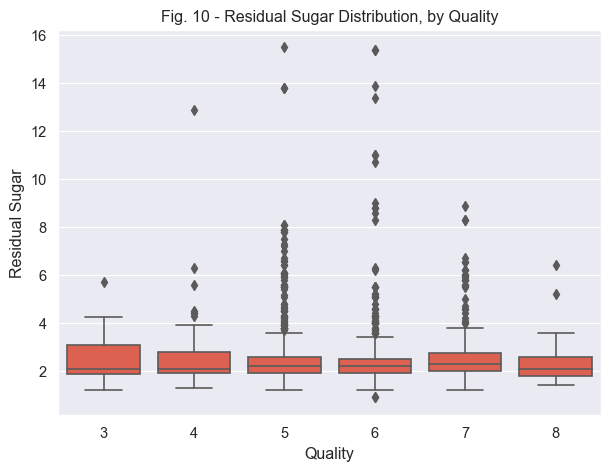

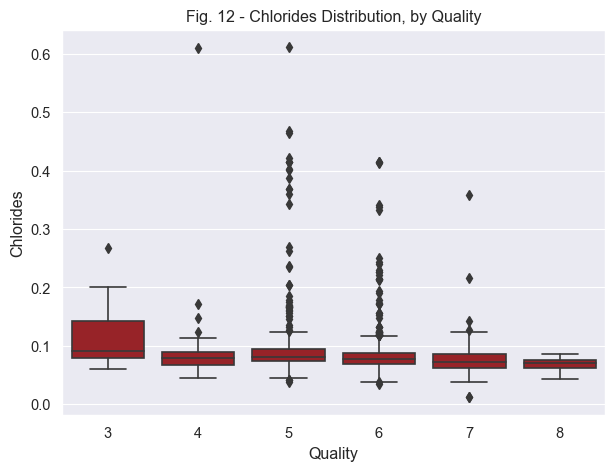

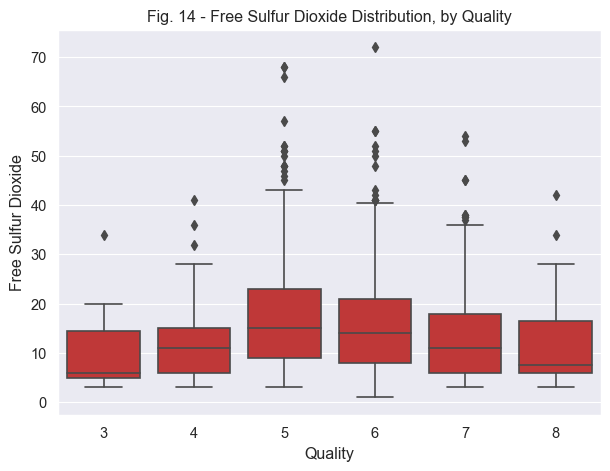

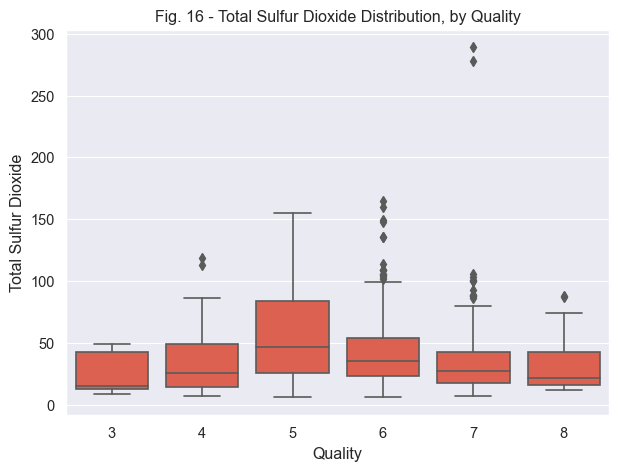

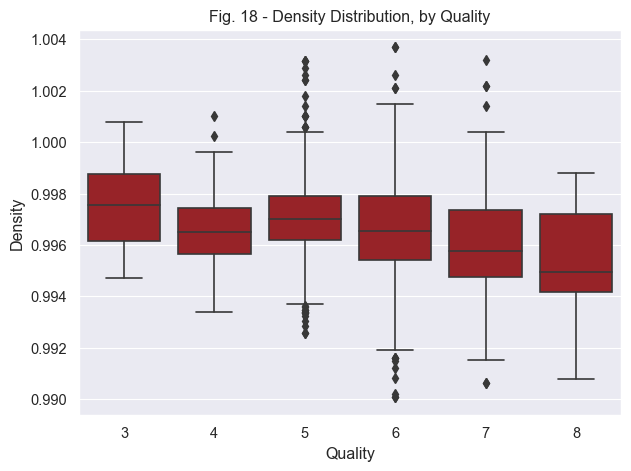

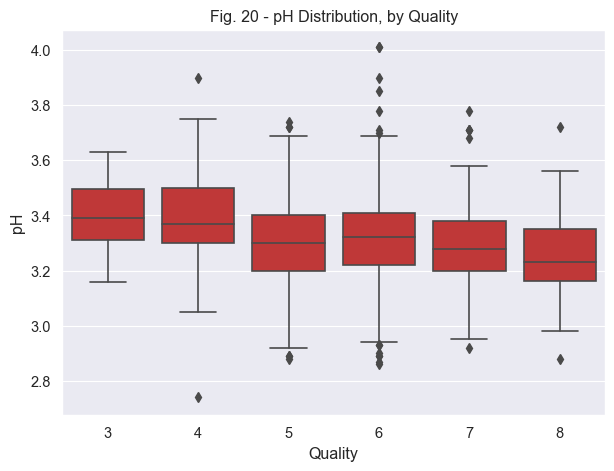

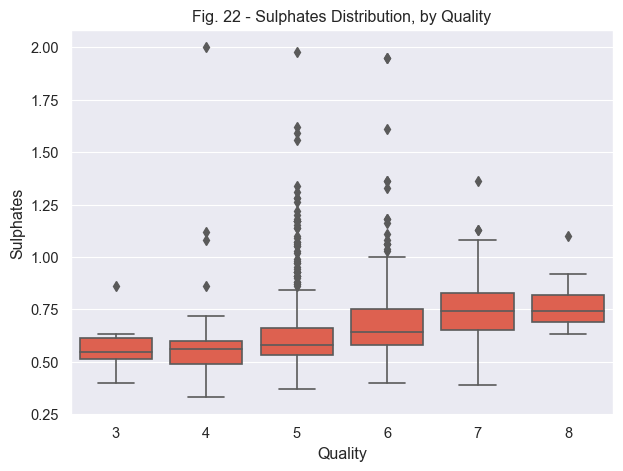

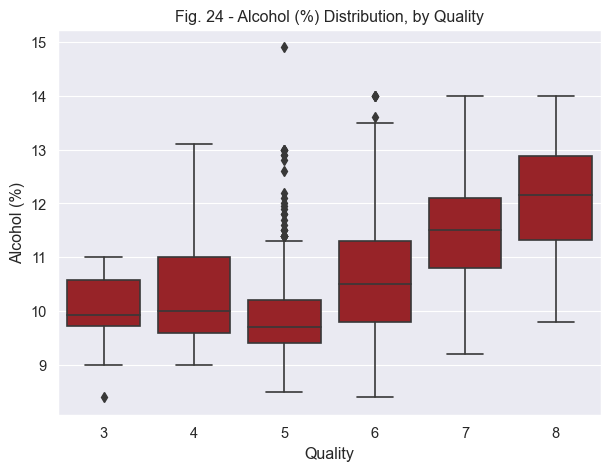

In [10]:
def make_boxes(df, categories, fig_start_num, custom_label=None):
    """Produces boxplots for every column in a list of categories.

    Parameters
    ----------
    categories : list
        A list of strings containing the column names of the data to plot.
    fig_start_num : int
        The "Fig." number of the first plot.
    
    Returns
    -------
    None
    """
    
    # Set the figure number to start from
    i = fig_start_num

    # Loop through each column in the list and create plot for each
    for column in categories:
        plt.figure(figsize=(7, 5))
        # Set the colour palette to use
        palette = sns.color_palette("Reds")[3:]

        ax = sns.boxplot(
            y=column, 
            x="quality", 
            data=df, 
            # Make each graph the next colour in the palette
            # % len(palette) prevents index error by looping back to start
            # if there are too many values.
            color=palette[(i - fig_start_num) % len(palette)],)
        
        # Format the labels to remove any underscores and capitalise the first letter
        label = column.replace("_", " ").title()
        # Label the graphs and show
        if custom_label and column in custom_label:
            ax.set_ylabel(f"{custom_label[column]}")
            ax.set_title(f"Fig. {i} - {custom_label[column]} Distribution, by Quality")
        else:
            ax.set_ylabel(f"{label}")
            ax.set_title(f"Fig. {i} - {label} Distribution, by Quality")
        
        ax.set_xlabel("Quality")

        plt.show()

        # i += 2 as I am going to make another graph for each in between
        i += 2

# Create a boxplot for each independent variable
make_boxes(df=wine_df, categories=cols, fig_start_num=4, custom_label={"pH": "pH", "alcohol": "Alcohol (%)"})

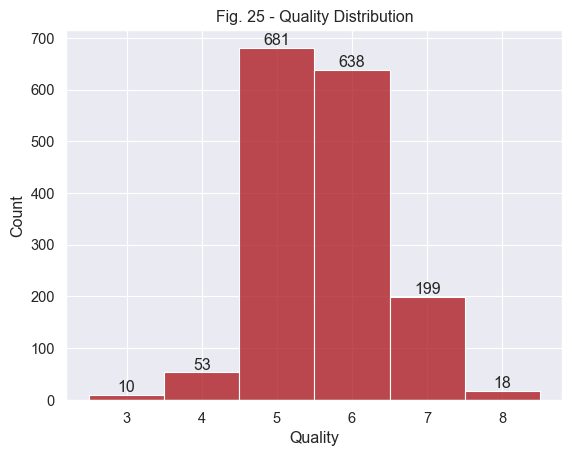

In [11]:
# Create histplot for quality
ax = sns.histplot(
    data=wine_df["quality"], discrete=True, color=sns.color_palette("Reds")[-1]
)

# Add labels and title
ax.bar_label(ax.containers[0])
ax.set_xlabel("Quality")
ax.set_title("Fig. 25 - Quality Distribution")

plt.show()



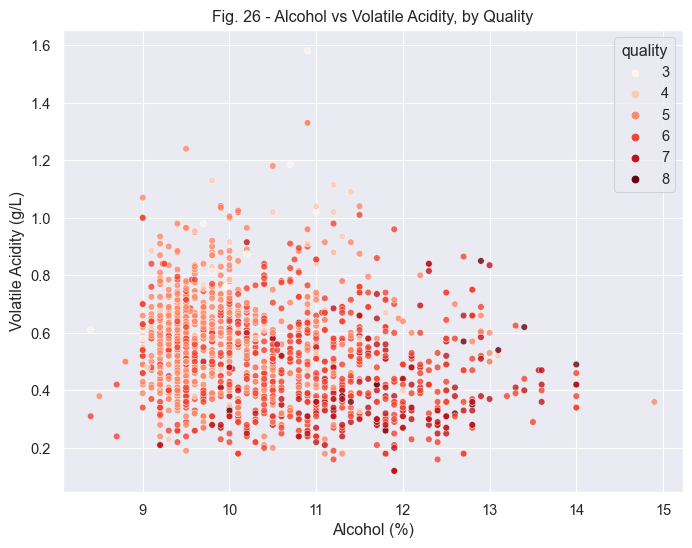

In [12]:
# Create a scatter plot to show the relationship between alcohol and volatile acidity
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    data=wine_df,
    x="alcohol",
    y="volatile acidity",
    hue="quality",
    palette="Reds",
    alpha=0.8,
)

# Add labels and title
ax.set_title("Fig. 26 - Alcohol vs Volatile Acidity, by Quality")
ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Volatile Acidity (g/L)")

plt.show()


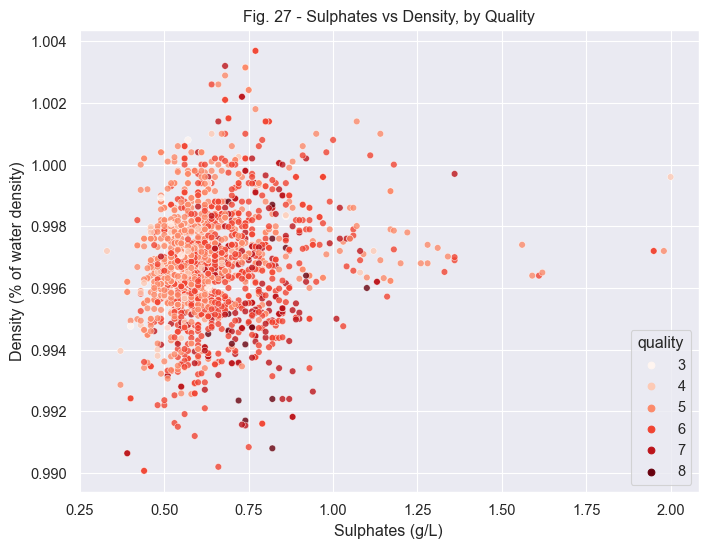

In [13]:
# Create a scatter plot to show the relationship between sulphates and density
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    data=wine_df,
    x="sulphates",
    y="density",
    hue="quality",
    palette="Reds",
    alpha=0.8,
)

# Add labels and title
ax.set_title("Fig. 27 - Sulphates vs Density, by Quality")
ax.set_xlabel("Sulphates (g/L)")
ax.set_ylabel("Density (% of water density)")

plt.show()


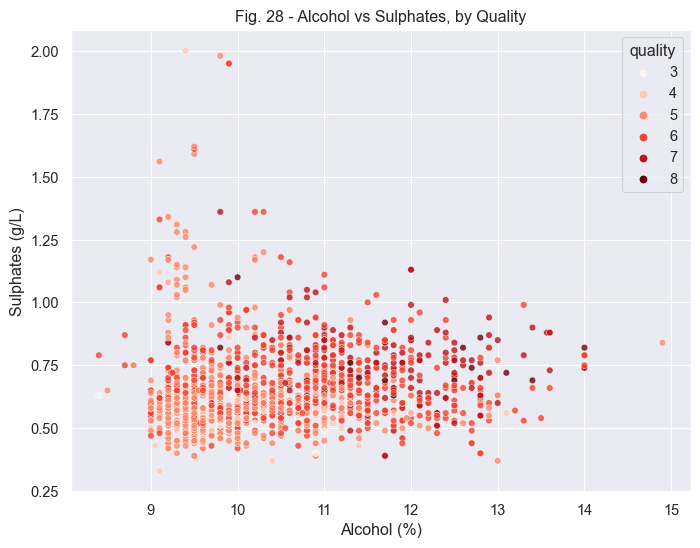

In [14]:
# Create a scatter plot to show the relationship between alcohol and sulphates
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    data=wine_df,
    x="alcohol",
    y="sulphates",
    hue="quality",
    palette="Reds",
    alpha=0.8,
)

# Add labels and title
ax.set_title("Fig. 28 - Alcohol vs Sulphates, by Quality")
ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Sulphates (g/L)")

plt.show()


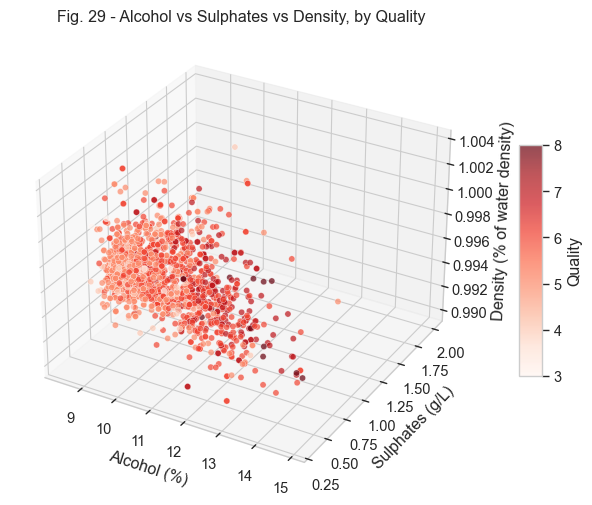

In [15]:
sns.set_theme(context="paper", style="whitegrid", font_scale=1.2)

# Create a 3d scatter plot to show the relationship between alcohol, volatile acidity and sulphates
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    wine_df["alcohol"],
    wine_df["sulphates"],
    wine_df["density"],
    c=wine_df["quality"],
    cmap="Reds",
    alpha=0.7,
    edgecolors="white",
    linewidth=0.3,
)

# Add labels and title
ax.set_title("Fig. 29 - Alcohol vs Sulphates vs Density, by Quality")
ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Sulphates (g/L)")
ax.set_zlabel("Density (% of water density)")

# Create a colorbar using ax to steal space from the 3d plot
cbar = fig.colorbar(ax.collections[0], ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Quality")

# Make space between z label and colourbar
fig.subplots_adjust(right=1.3)

plt.show()


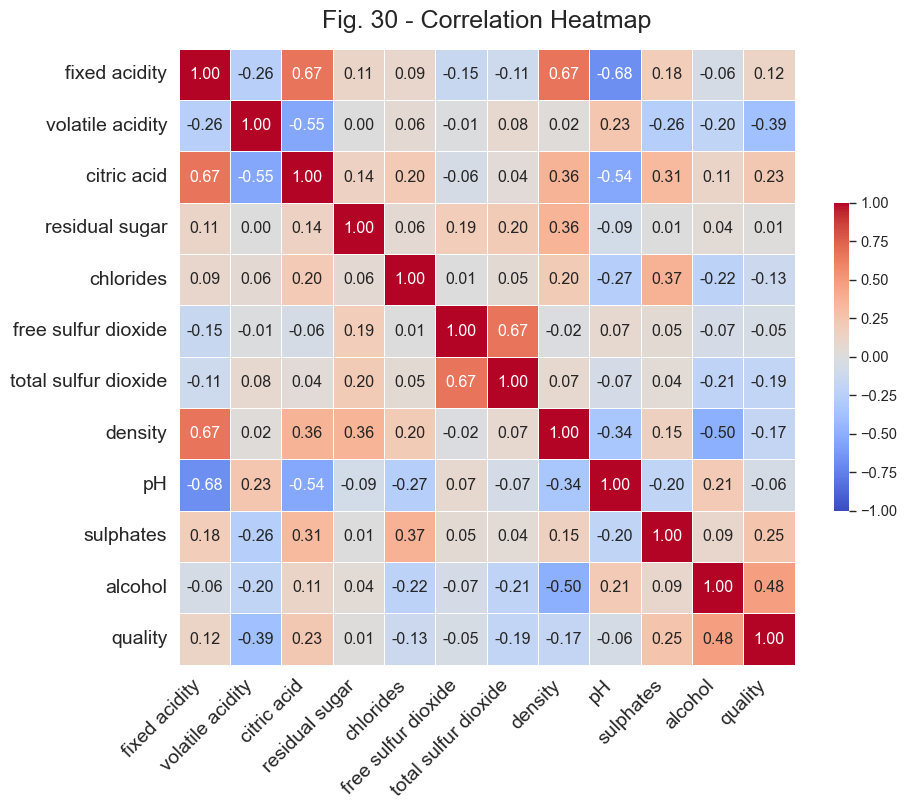

In [16]:
# Create a correlation heatmap for all features
plt.figure(figsize=(10, 8))

ax = sns.heatmap(
    wine_df.corr(),
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    fmt=".2f",
)

# Add labels and title
ax.set_title("Fig. 30 - Correlation Heatmap", size=18, pad=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=14)

plt.show()


In [17]:
# Create plotly parrallel coordinates plot to show the relationship 
# between alcohol, pH and volatile acidity with quality as the hue

# Select the variables to include in the plot
variables = ["alcohol", "pH", "volatile acidity"]

# Create a loop to create the plots to show different filters
for fig_num in range(31, 34):
    # Create a plot
    fig = px.parallel_coordinates(
        wine_df,
        dimensions=variables,
        color="quality",
        color_continuous_scale=px.colors.colorbrewer.RdBu_r,
        labels={
            "alcohol": "Alcohol (%)",
            "pH": "pH",
            "volatile acidity": "Volatile Acidity (g/L)",
        }, 
    )

    # Format the title, font size, and layout
    fig.update_layout(
        title={
            'text': f"Fig. {fig_num} - Alcohol vs pH vs Volatile Acidity, by Quality",
            'y':.99,
            'x':0.5,
            'font_size': 28,
        },
        margin={'t': 110},
        font_size=22,
        width=1000,
        height=500,
    )


    fig.show()



/Users/willgosnold/miniconda3/envs/hyperiondev/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


/Users/willgosnold/miniconda3/envs/hyperiondev/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



/Users/willgosnold/miniconda3/envs/hyperiondev/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



### Thanks for reading!